In [36]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D , MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [25]:
airplane = np.load('airplane.npy')
icecream = np.load('ice cream.npy')
cloud = np.load('cloud.npy')
eyeglasses= np.load('eyeglasses.npy')

print(airplane.shape)
print(icecream.shape)
print(cloud.shape)
print(eyeglasses.shape)
  '''   
This code appears to be loading four files, 'airplane.npy', 'ice cream.npy', 'cloud.npy', and 'eyeglasses.npy' into four numpy arrays, 'airplane', 'icecream', 'cloud', and 'eyeglasses', respectively. 
The .npy file format is used to store numpy arrays. The shape of an array gives the dimensions of the array. The shape attribute is an tuple that gives the size of each dimension of the array. 
The print() function is used to display the shape of each array. For example, if the shape of the 'airplane' array is (100,200,3), it means that the array has 100 rows, 200 columns, and 3 channels (RGB)
So this code  is checking the shape of these 4 numpy arrays and printing it.
  '''





(151623, 784)
(123133, 784)
(120265, 784)
(225762, 784)


In [14]:
def plot_samples(input_array, rows=4, cols=5, title='')
#This is a Python function called "plot_samples" that plots a grid of images from a given input array.
    
    fig, ax = plt.subplots(figsize=(cols,rows))
    #The function creates a new figure and sets its size based on the number of rows and columns specified. 

    ax.axis('off')#It then sets the axis off and sets the title of the plot.
    plt.title(title)

    for i in list(range(0, min(len(input_array),(rows*cols)) )):
#The loop runs for a maximum of the minimum value between the length of the input array and the total number of cells (rows*cols).

        a = fig.add_subplot(rows,cols,i+1)#A for loop is used to add each image to the plot. 
        imgplot = plt.imshow(input_array[i,:784].reshape((28,28)), cmap='gray_r', interpolation='nearest')
        #The function reshapes the image to 28x28 and sets the colormap to 'gray_r' and the interpolation to 'nearest'. 

        plt.xticks([]) #The x and y ticks are set to be empty so the gridlines do not appear in the final plot.
        plt.yticks([])
        
 

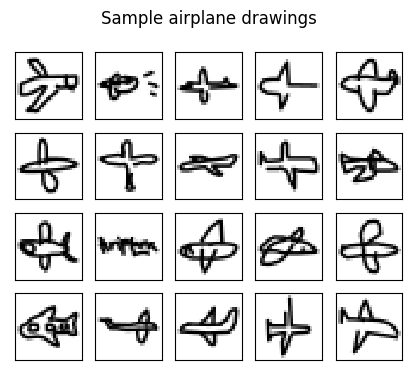

In [76]:
plot_samples(airplane, title='Sample airplane drawings\n')#This line of code is calling the plot_samples() function defined earlier and passing it the 'airplane' array as the input_array and 'Sample airplane drawings\n' as the title.

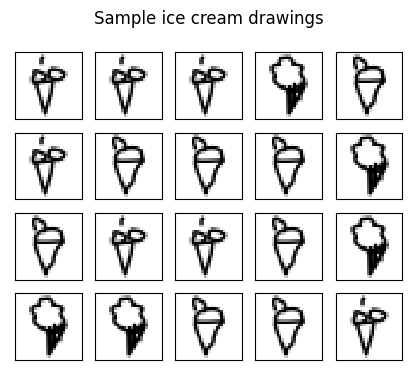

In [7]:
plot_samples(icecream, title='Sample ice cream drawings\n')


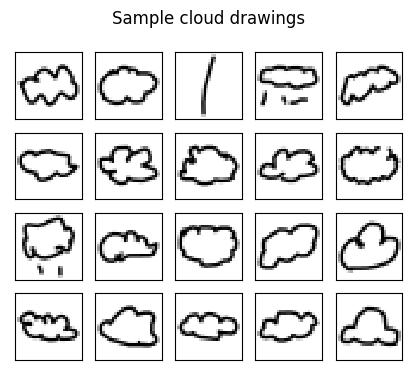

In [8]:
plot_samples(cloud, title='Sample cloud drawings\n')

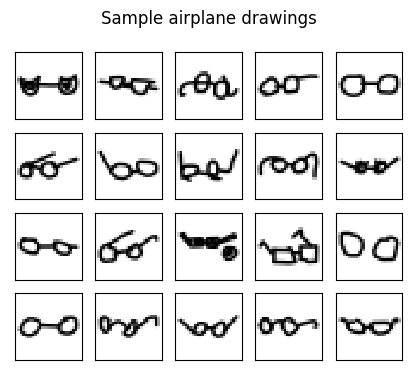

In [9]:
plot_samples(eyeglasses, title='Sample airplane drawings\n')

In [26]:
# add a column with labels
airplane = np.c_[airplane, np.zeros(len(airplane))]
icecream = np.c_[icecream, np.ones(len(icecream))]
cloud = np.c_[cloud, 2*np.ones(len(cloud))]
eyeglasses = np.c_[eyeglasses, 3*np.ones(len(eyeglasses))]
label_dict = {0:'airplane', 1:'ice cream', 2:'cloud', 3:'eyeglasses'}


In [27]:
# merge the arrays, and split the features (X) and labels (y). Convert to float32 to save some memory.
X = np.concatenate((airplane[:5000,:-1], icecream[:5000,:-1], cloud[:5000,:-1],eyeglasses[:5000,:-1]), axis=0).astype('float32') # all columns but the last
y = np.concatenate((airplane[:5000,-1], icecream[:5000,-1], cloud[:5000,-1], eyeglasses[:5000,-1]), axis=0).astype('float32') 

# train/test split (divide by 255 to obtain normalized values between 0 and 1)
# I will use a 50:50 split.
X_train, X_test, y_train, y_test = train_test_split(X/255.,y,test_size=0.5,random_state=0)

In [7]:
X_train,X_test, y_train, y_test = train_test_split(X/255., y, test_size = 0.5, random_state =0)


In [44]:
#one hot encoding the output
# one hot encode outputs
y_train_cnn = np_utils.to_categorical(y_train)
y_test_cnn = np_utils.to_categorical(y_test)
num_classes = y_test_cnn.shape[1]

In [45]:
# reshape to be [samples][pixels][width][height]
X_train_cnn = X_train.reshape(X_train.shape[0], 28, 28,1).astype('float32')
X_test_cnn = X_test.reshape(X_test.shape[0], 28, 28,1).astype('float32')
xr= np.asarray(X_train_cnn).astype('float32').reshape((-1,1))
yr= np.asarray(y_test_cnn).astype('float32').reshape((-1,1))




In [34]:
# define the CNN model
def cnn_model():
    # create model
    model =Sequential()
    model.add(Conv2D(30,3,3,input_shape=(28,28,1),activation='relu'))
    model.add(Conv2D(15,kernel_size=(48, 48), activation='relu', input_shape=(28,28,1), padding='same'))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [31]:
%%time
np.random.seed(0)
# build the model
model_cnn = cnn_model()
# Fit the model
history=model_cnn.fit(X_train_cnn, y_train_cnn, validation_data=(X_test_cnn, y_test_cnn), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model_cnn.evaluate(X_test_cnn, y_test_cnn, verbose=0)
print('Final CNN accuracy: ', scores[1])

Epoch 1/10
50/50 [==============================] - 144s 3s/step - loss: 0.6047 - accuracy: 0.8028 - val_loss: 0.3549 - val_accuracy: 0.8816
Epoch 2/10
50/50 [==============================] - 147s 3s/step - loss: 0.3100 - accuracy: 0.9016 - val_loss: 0.2661 - val_accuracy: 0.9101
Epoch 3/10
50/50 [==============================] - 154s 3s/step - loss: 0.2331 - accuracy: 0.9240 - val_loss: 0.2214 - val_accuracy: 0.9258
Epoch 4/10
50/50 [==============================] - 160s 3s/step - loss: 0.1799 - accuracy: 0.9420 - val_loss: 0.1806 - val_accuracy: 0.9397
Epoch 5/10
50/50 [==============================] - 159s 3s/step - loss: 0.1523 - accuracy: 0.9506 - val_loss: 0.1750 - val_accuracy: 0.9398
Epoch 6/10
50/50 [==============================] - 267s 5s/step - loss: 0.1330 - accuracy: 0.9556 - val_loss: 0.1673 - val_accuracy: 0.9450
Epoch 7/10
50/50 [==============================] - 266s 5s/step - loss: 0.1151 - accuracy: 0.9611 - val_loss: 0.1657 - val_accuracy: 0.9465
Epoch 8/10
50

In [32]:
y_pred_cnn = model_cnn.predict_classes(X_test_cnn, batch_size=32, verbose=0)
acc_cnn = accuracy_score(y_test, y_pred_cnn)
print ('CNN accuracy: ',acc_cnn)

c:\users\srini\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


CNN accuracy:  0.9421


In [66]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

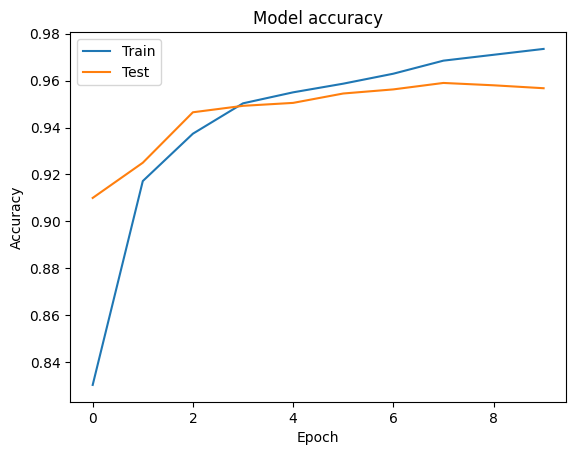

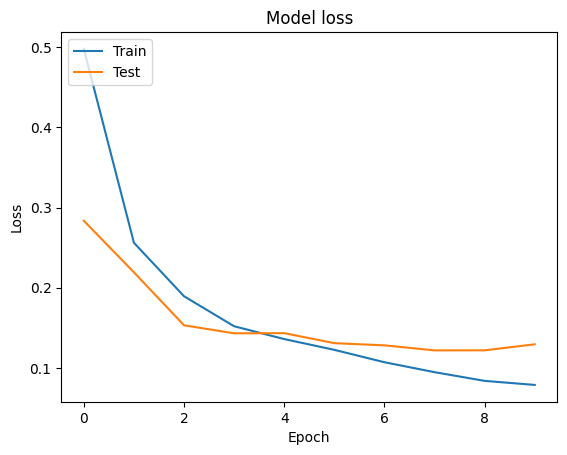

In [67]:
# Graphing the accuracy and loss of the training and testing datasets
# Accuracy of the model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Loss of the model
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

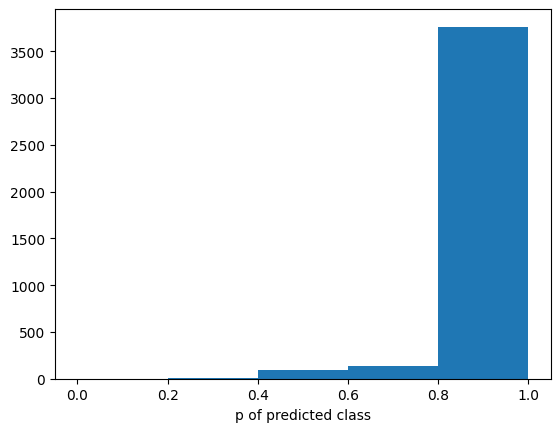

In [68]:
from scipy.stats import norm

cnn_probab = model_cnn.predict(X_test_cnn, batch_size=32, verbose=0) #This line of code is using the predict method of a model (called model_cnn) to predict the probability of each test sample in X_test_cnn. 
#The batch size is set to 32 and verbosity is set to 0, so the model will process the predictions in batches of 32 samples and will not print any progress updates during the prediction process. 
#The output of the predict method will be the predicted probability of each sample.

# extract the probability for the label that was predicted:
p_max = np.amax(cnn_probab, axis=1)

plt.hist(p_max, bins=list(np.linspace(0,1,6)));#This code is using a pre-trained model called "model_cnn" to predict the probability of each sample in the "X_test_cnn" dataset. 
#The model processes the predictions in batches of 32 samples and does not print any progress updates during the prediction process. The output of the predict method is the predicted probability of each sample. Then it extracts the maximum probability among all the classes and plots a histogram of those probabilities with a normal distribution, x-axis label as "p of predicted class" .
plt.xlabel('p of predicted class');

In [69]:
np.mean(p_max)


0.9673779

In [70]:
np.amin(p_max)


0.34174126

C:\Users\srini\AppData\Local\Temp\ipykernel_11892\3751348030.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot2grid((10, 5), (i, 0), colspan=4);


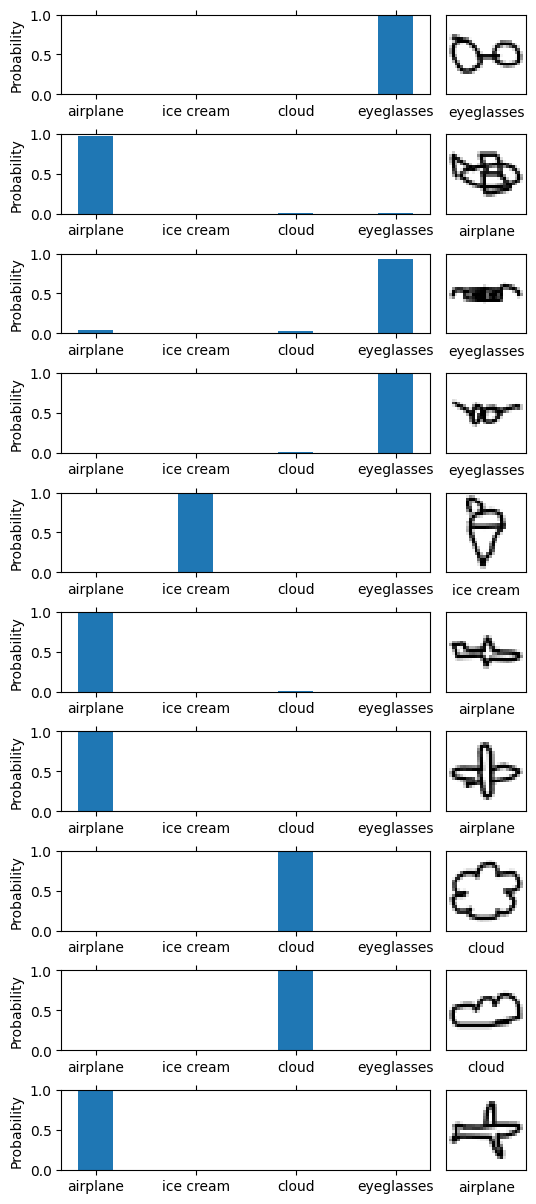

In [71]:
fig, ax = plt.subplots(figsize=(6,15))

for i in list(range(10)):

    # plot probabilities:
    ax = plt.subplot2grid((10, 5), (i, 0), colspan=4);
    plt.bar(np.arange(4), cnn_probab[i], 0.35, align='center');
    plt.xticks(np.arange(4), ['airplane','ice cream','cloud','eyeglasses'])
    plt.tick_params(axis='x', bottom='off', top='off')
    plt.ylabel('Probability')
    plt.ylim(0,1)
    plt.subplots_adjust(hspace = 0.5)

    # plot picture:
    ax = plt.subplot2grid((10, 5), (i, 4), colspan=4);
    plt.imshow(X_test[i].reshape((28,28)),cmap='gray_r', interpolation='nearest');
    plt.xlabel(label_dict[y_test[i]]); # get the label from the dict
    plt.xticks([])
    plt.yticks([])

C:\Users\srini\AppData\Local\Temp\ipykernel_11892\1155919891.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot2grid((10, 5), (i, 0), colspan=4);


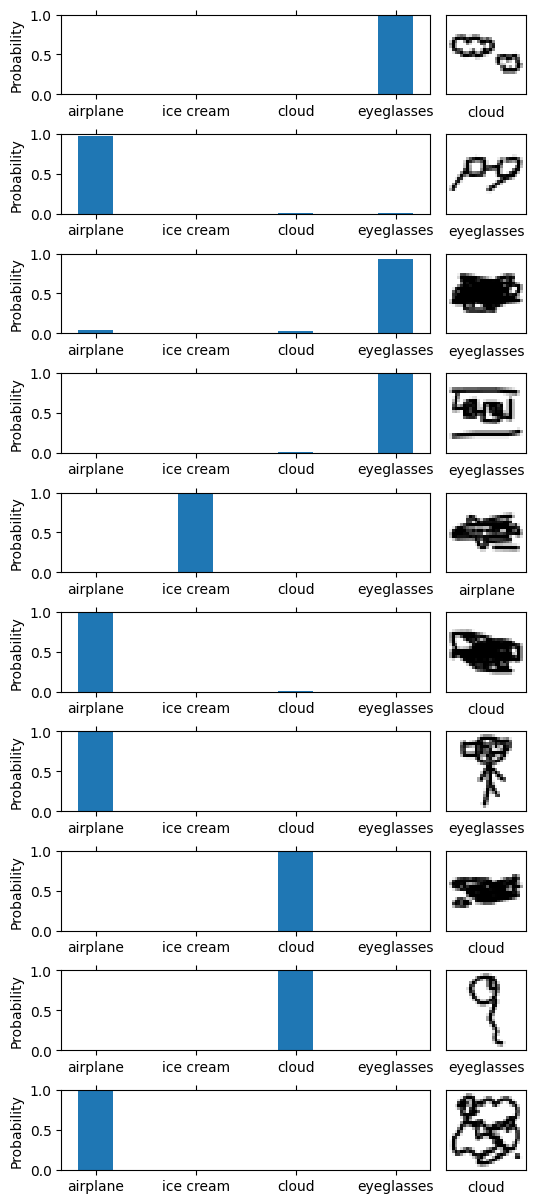

In [72]:
# Let's take a look at some pictures where the CNN was very unsure about the label by filtering with [p_max<0.5]:
fig, ax = plt.subplots(figsize=(6,15))

for i in list(range(10)):

    # plot probabilities:
    ax = plt.subplot2grid((10, 5), (i, 0), colspan=4);
    """This line of code is creating a subplot in a grid. 
    It is using the plt.subplot2grid() function which is used to add a subplot in a grid of the specified shape. 
    It is defined by the tuple (10, 5) which means 10 rows and 5 columns grid. 
    The subplot is placed in the i-th row and 0-th column with colspan of 4.
    The colspan attribute is the number of columns that the subplot will span in the grid. 
    This is useful in creating subplots of different sizes and shapes in the grid."""
    plt.bar(np.arange(4), cnn_probab[i], 0.35, align='center');
    plt.xticks(np.arange(4), ['airplane','ice cream','cloud','eyeglasses'])
    plt.tick_params(axis='x', bottom='off', top='off')
    plt.ylabel('Probability')
    plt.ylim(0,1)
    plt.subplots_adjust(hspace = 0.5)

    # plot picture:
    ax = plt.subplot2grid((10, 5), (i, 4), colspan=4);
    plt.imshow(X_test[p_max<0.5][i].reshape((28,28)),cmap='gray_r', interpolation='nearest');
    plt.xlabel(label_dict[y_test[p_max<0.5][i]]);
    '''This line of code uses the Matplotlib library to create an image of a 28x28 pixel array, which is passed as the first argument to the imshow() function. 
    The image is shown in grayscale, with the 'gray_r' colormap (reversed grayscale), and the 'nearest' interpolation method is used. 
    The X_test[p_max<0.5][i].reshape((28,28)) this is an array reshaped of 28x28 size, this array represent an image.
    p_max<0.5 this is a boolean mask that is used to select only those elements of the X_test array where the corresponding element of p_max is less than 0.5. 
    The variable i is used to index the selected elements of the X_test array. The final output is an image of the array on the screen.'''
    plt.xticks([])
    plt.yticks([])

In [33]:
import itertools # This uses the itertools.product() function from the itertools library to generate the coordinates for the confusion matrix. 
#The product() function returns an iterator over the Cartesian product of input iterables.

'''The function takes several input arguments:

cm: The confusion matrix to be plotted. It should be a 2D array.
classes: The class labels for the confusion matrix. It should be a list or an array.
normalize: A boolean value indicating whether the matrix should be normalized or not. The default value is False.
title: The title of the plot. The default value is 'Confusion matrix'.
cmap: The colormap to be used for the plot. The default value is plt.cm.Blues.
So this function can be used to plot a confusion matrix for a classification algorithm,
with the option to normalize the matrix and customize the title and color map of the plot.'''

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):#This is a Python function called "plot_confusion_matrix" 
    #that plots a confusion matrix, which is a table that is used to define the performance of a classification algorithm.
  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
'''This code is using the matplotlib library to plot a confusion matrix (cm) with a specified color map (cmap), 
and it is adding various labels and formatting to the plot, such as a title, a colorbar, and tick marks for the x and y axes. 
The xticks and yticks are being set to the list of classes and the rotation of x-axis labels is set to 45 degrees.'''
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 5)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
     '''This code is checking the value of the normalize parameter passed to the plot_confusion_matrix() function. 
If normalize is True, it normalizes the confusion matrix by dividing each element of the matrix by the sum of the elements in the corresponding row.
The numpy function astype is used to convert the data type of the array to float.
It then uses the numpy.round() function to round the normalized matrix to 5 decimal places.
It then prints the message 'Normalized confusion matrix'
If normalize is False, it prints the message 'Confusion matrix, without normalization'
Finally, it prints the confusion matrix using the print() function.
Normalization is done to scale the value of each element of the matrix between 0 and 1. So that it would be easy to compare the different elements of the matrix.
This can be useful when the number of samples in each class is not equal.
Without normalizing, the matrix will not be useful to compare the performance of the classifier on different classes.'''
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
'''This code is adding text annotations to the confusion matrix plot. 
The variable "thresh" is set to be half of the maximum value in the confusion matrix. 
Then, using the itertools.product function, it is iterating over every element (i, j) in the matrix. 
For each element, it is adding a text annotation to the plot at position (j, i) with the value of cm[i, j]. 
The text is horizontally aligned to the center and the color is set to be white if cm[i, j] is greater than thresh, otherwise it is set to black.
This is used to highlight the cells of confusion matrix which are having higher values as they are considered to be more important.'''
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    '''This code is finalizing the formatting of the confusion matrix plot. 
    The "plt.tight_layout()" function is adjusting the layout of the plot to minimize the amount of whitespace around it. 
    The y-axis is labeled "True label" and x-axis is labeled "Predicted label" with plt.ylabel and plt.xlabel respectively. 
    This is to make it clear that the rows represent the true labels and the columns represent the predicted labels in the confusion matrix.'''

Confusion matrix, without normalization
[[2382   11    6   43]
 [  13 2522    0    5]
 [ 148   15 2208  128]
 [ 162    9   39 2309]]


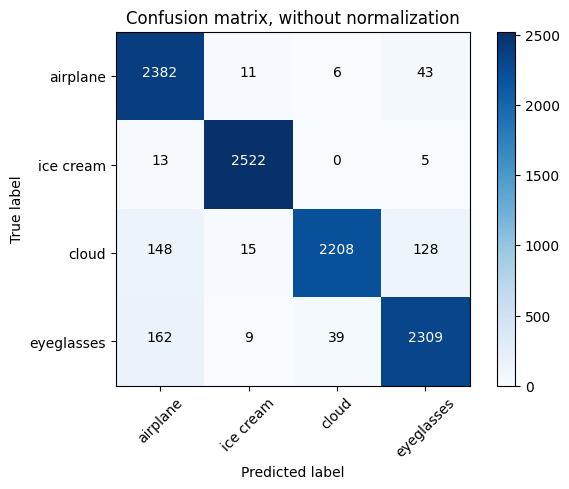

In [34]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_cnn)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['airplane','ice cream','cloud','eyeglasses'],
                      title='Confusion matrix, without normalization')

plt.show()

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import vectorize
import json
import time
np.random.seed(32113)
import feature_engineering_func as fe_func
import cnn_func
import ensemble_method_func as em_func
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [50]:
category = "cat_word_ems"
filepath = "cat.ndjson"
df = pd.read_json(filepath, lines=True)

In [52]:
fe_func.ensemble_function_for_feature_engineering_(df,category,60000,'word')
#this creates new file in data folder "./data/MY_feature_{}.pkl".format(category)
#if you want to work on image prediction run following:
# fe_func.feature_engineering_ensemble(df,category,60000,'word')

C:\Users\srini\feature_engineering_func.py:199: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cf['direction'] = pd.Series(direction)


--- 906.2524428367615 seconds ---


In [53]:
df_final = fe_func.The_feature_engineering__(df,category,60000,'country')
#this creates new file in data folder "./data/{}_15.pkl".format(category)
#if you want to work on image prediction run following:
# df_final = fe_func.feature_engineering_CNN(df,category,60000,'word')

C:\Users\srini\feature_engineering_func.py:340: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_cf['total_number_of_datapoints'] = pd.Series(ttnum_dp)
C:\Users\srini\feature_engineering_func.py:341: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_cf['Ymax'] = pd.Series(Ymax)
C:\Users\srini\feature_engineering_func.py:342: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_cf['time'] = pd.Series(time)
C:\Users\srini\feature_engineering_func.py:343: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_cf['total_time_drawing'] = pd.S

KeyError: '0'